In [5]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [6]:
df = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_london.csv')
df.head()

,Date,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
0,2016-01-02,1092025,573,982,970,709,1325,Saturday
1,2016-01-02,1091680,573,318,1201,966,1492,Saturday
2,2016-01-02,1091681,573,319,1525,1141,2037,Saturday
3,2016-01-02,1091682,573,320,1116,824,1511,Saturday
4,2016-01-02,1091683,573,321,1075,853,1354,Saturday


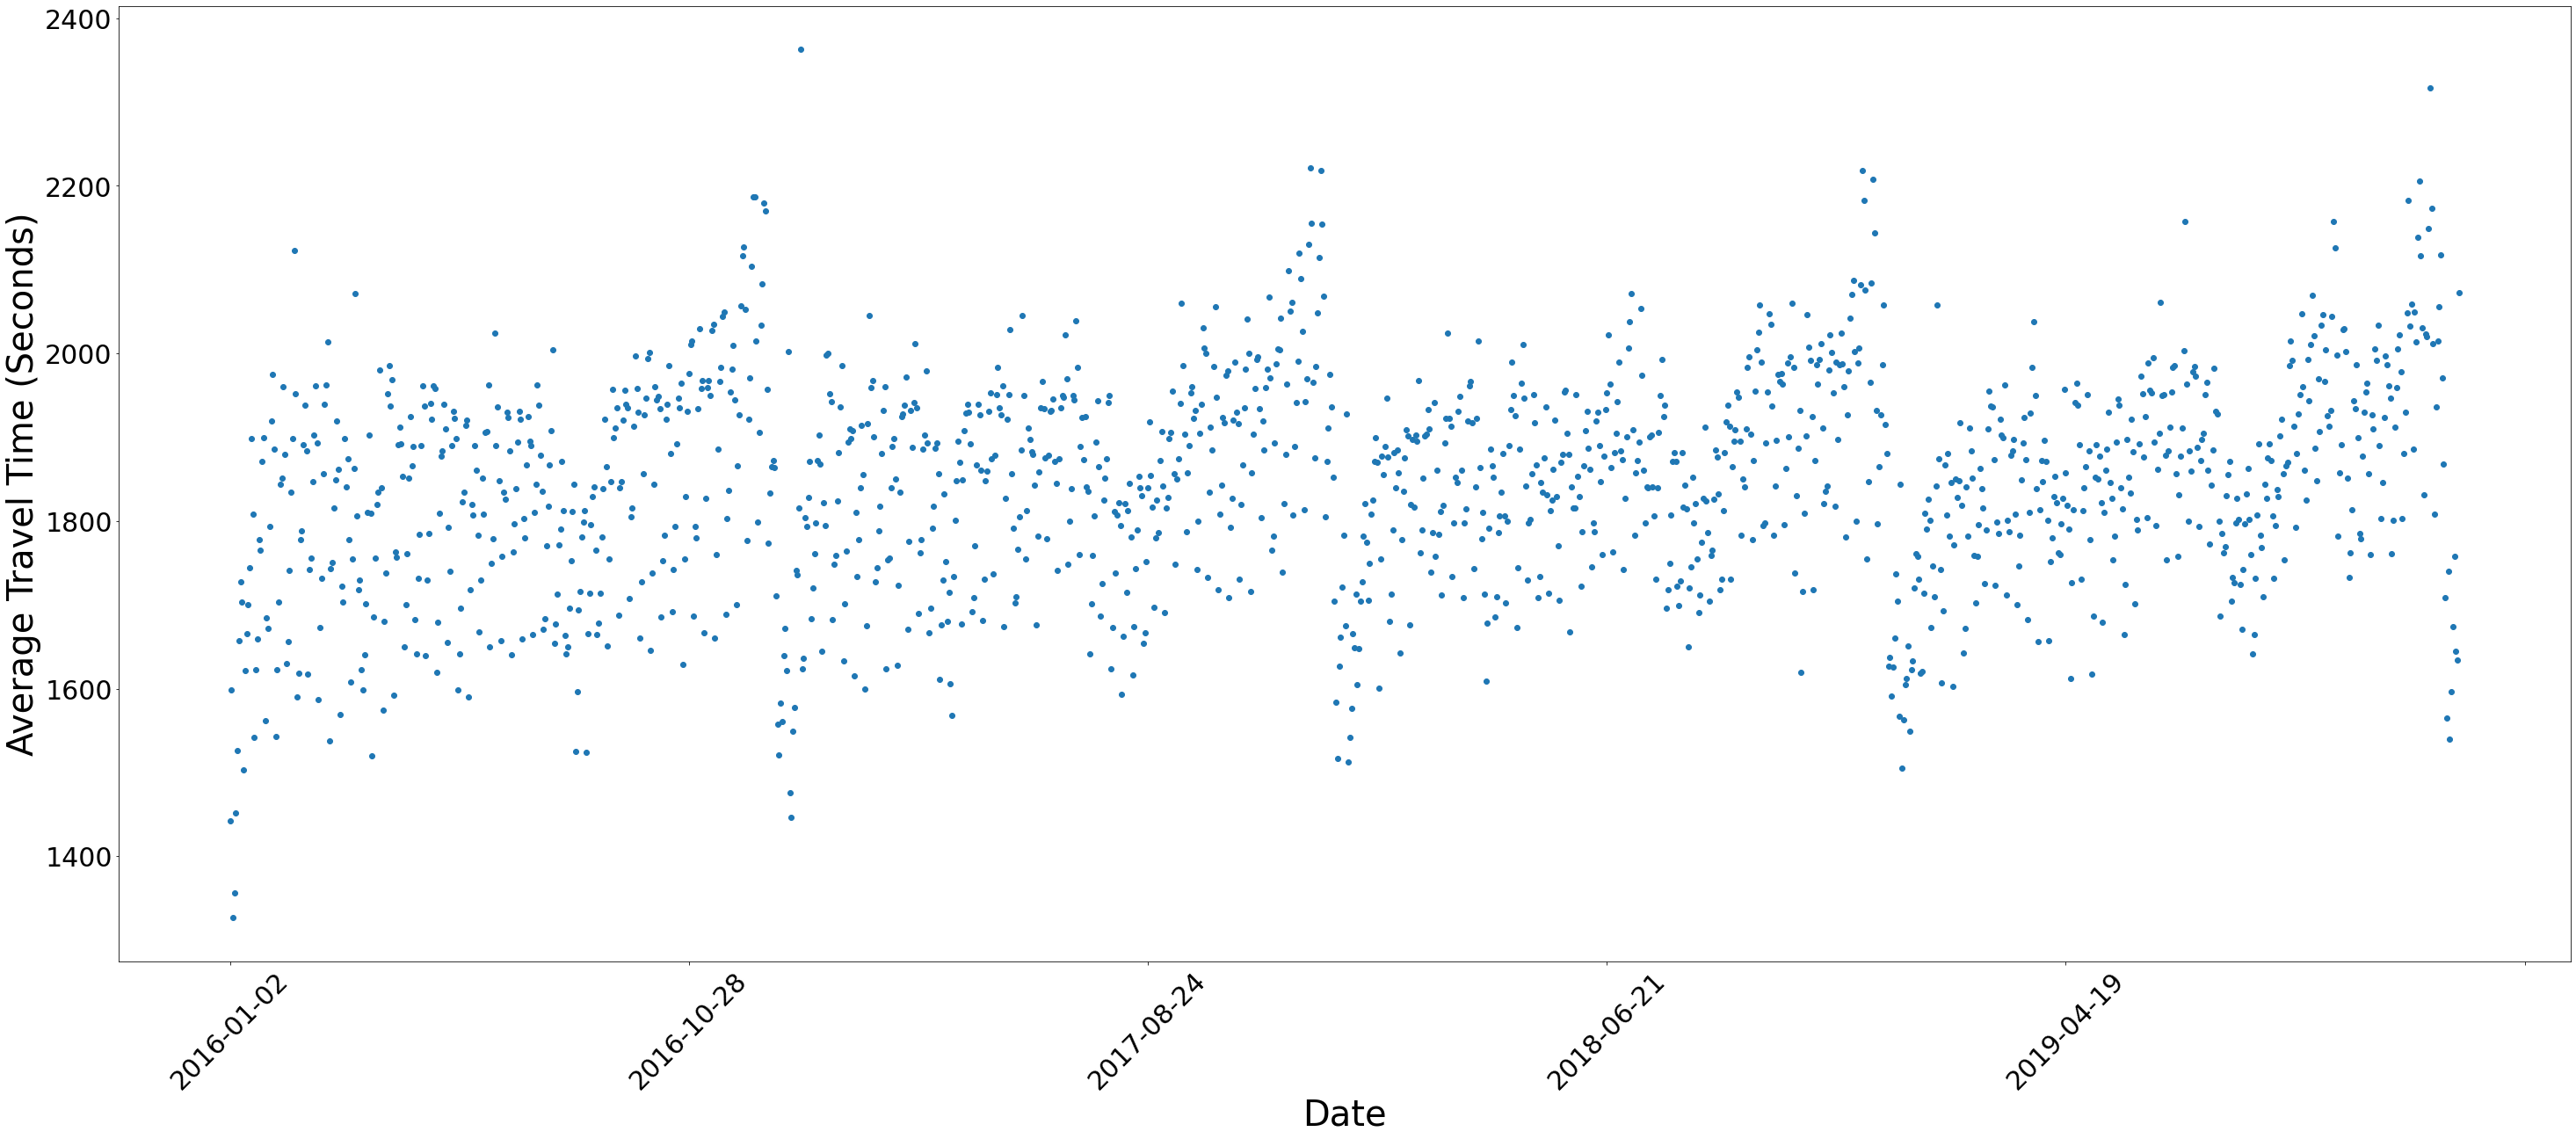

In [7]:
# Plot average travel time per date
avg_travel_times = df.groupby('Date')['MeanTravelTimeSeconds'].mean()[:-90]

fig, ax = plt.subplots(figsize=(50,20))
ax.scatter(df['Date'].unique()[:-90], avg_travel_times)

plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Average Travel Time (Seconds)", fontsize=40)
# for year in range(start_date.year, end_date.year):   
#     plt.axvline(pd.to_datetime(str(year+'01-01'), color='k', linestyle='--', alpha=0.2))
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

In [8]:
avg_travel_times.tail()

Date
2019-12-28    1673.744361
2019-12-29    1758.260372
2019-12-30    1644.157337
2019-12-31    1633.686767
2020-01-01    2072.401077
Name: MeanTravelTimeSeconds, dtype: float64

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


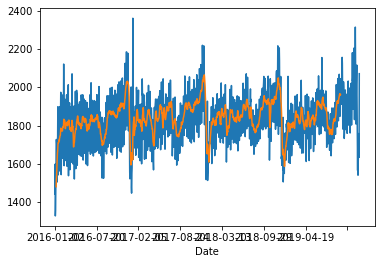

In [9]:
avg_travel_times.plot()
weekly_avg_travel_times = avg_travel_times[:-90].rolling(window=7).mean().plot()

In [10]:
daily_trip_count = df.groupby('Date')['MeanTravelTimeSeconds'].count()

In [11]:
df.set_index(['Date'], inplace=True)
df.index = pd.to_datetime(df.index)
df.head()
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
df.head(1)

,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
Date,,,,,,,
2016-01-02,1092025,573,982,970,709,1325,Saturday


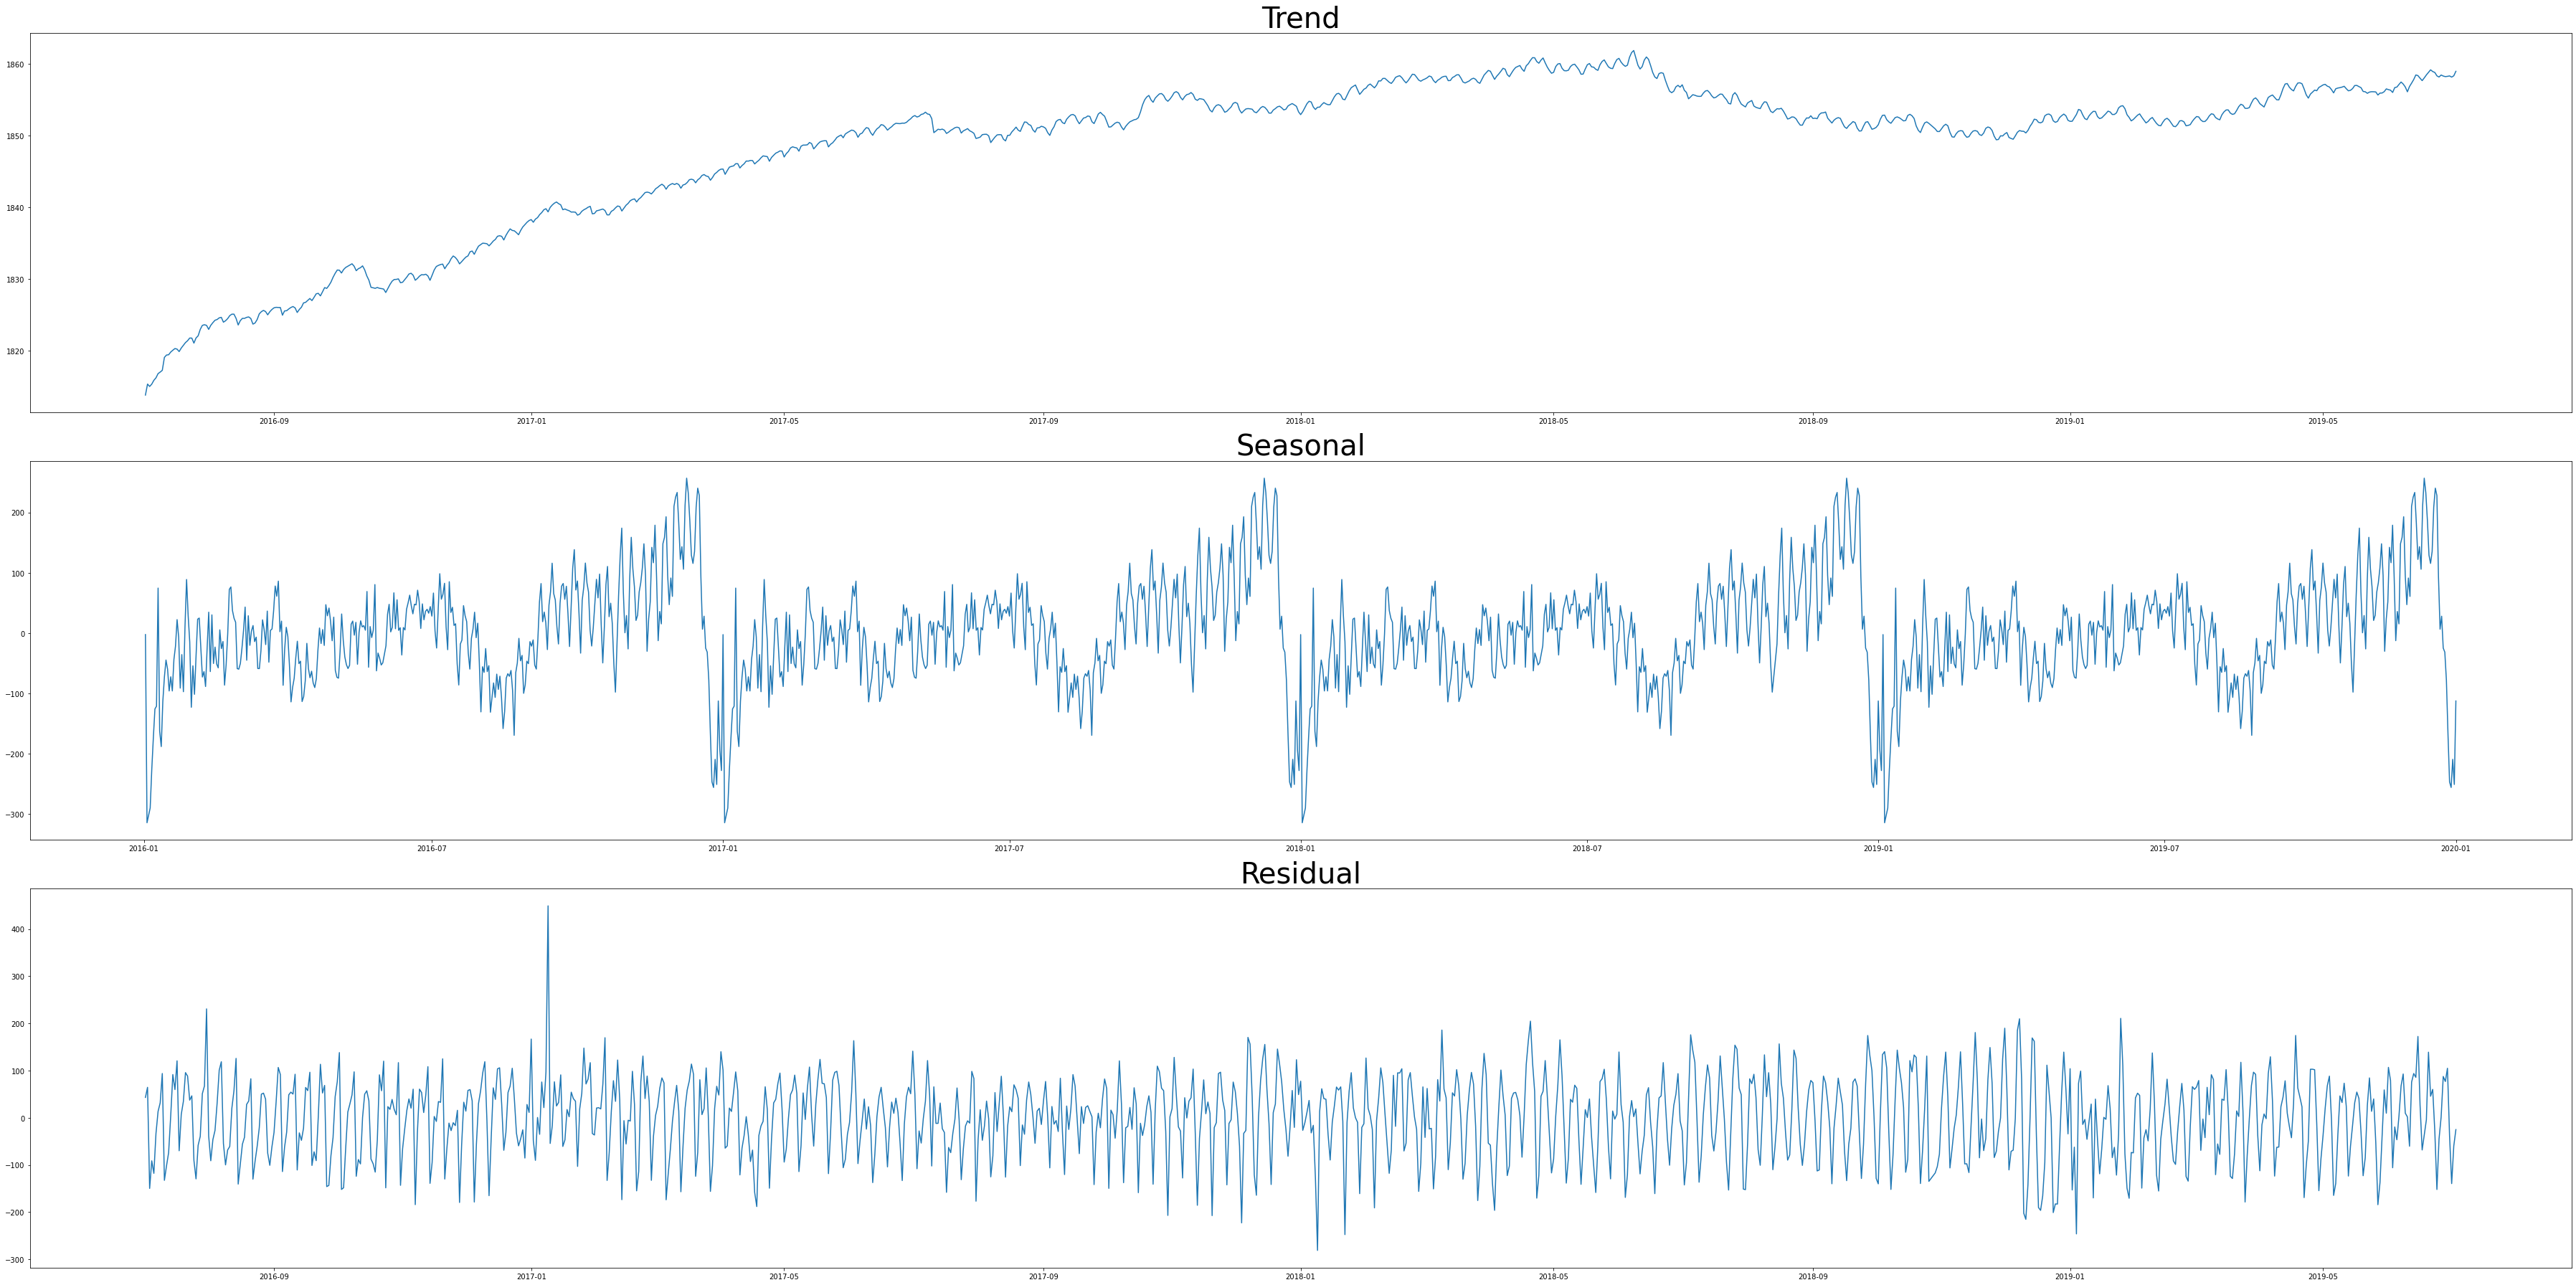

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(avg_travel_times, model='additive', period=365)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(50,25))
# ax.plot(df.index.unique(), seasonal)
# plt.show()

# plt.plot(df.index.unique(), trend)
# plt.show()
# plt.plot(df.index.unique(), seasonal)
# plt.show()
# plt.plot(df.index.unique(), residual)
# plt.show()

ax1.plot(df.index.unique()[:-90], trend)
ax1.set_title("Trend", fontsize=40)
ax2.plot(df.index.unique()[:-90], seasonal)
ax2.set_title("Seasonal", fontsize=40)
ax3.plot(df.index.unique()[:-90], residual)
ax3.set_title("Residual", fontsize=40)

fig.tight_layout()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(avg_travel_times[:-90], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Used Lag: %f' % result[2])
print('Number of observations used for the ADF regression: %f' % result[3])

ADF Statistic: -6.510778
p-value: 0.000000
Used Lag: 21.000000
Number of observations used for the ADF regression: 1346.000000


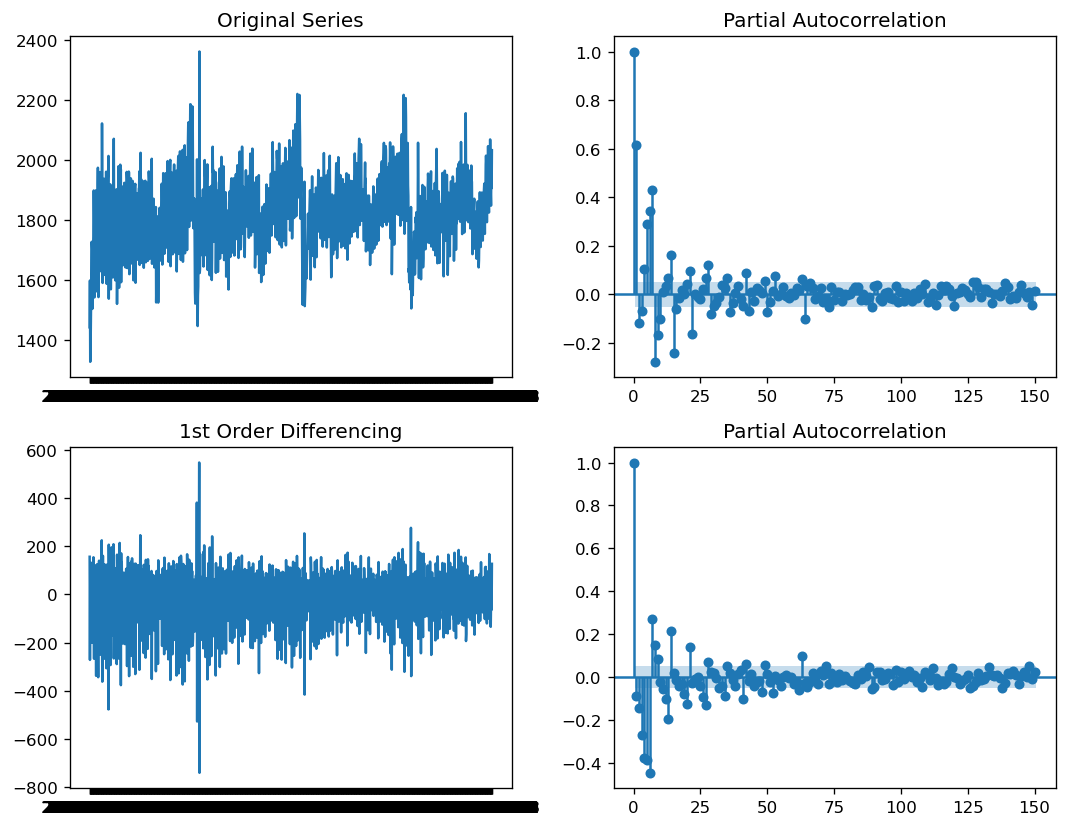

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0, 0].plot(avg_travel_times[:-90]); axes[0, 0].set_title('Original Series')
plot_pacf(avg_travel_times, ax=axes[0, 1], lags=150)

# 1st Differencing
axes[1, 0].plot(avg_travel_times[:-90].diff().dropna()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(avg_travel_times.diff().dropna(), ax=axes[1, 1], lags=150)

# # 2nd Differencing
# axes[2, 0].plot(avg_travel_times.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(avg_travel_times.diff().diff().dropna(), ax=axes[2, 1])

# axes.xaxis.set_major_locator(ticker.AutoLocator())
# axes.xaxis.set_minor_locator(ticker.AutoMinorLocator())

# plt.setp(ax.get_xticklabels(), horizontalalignment='right')

fig.tight_layout()
plt.show()

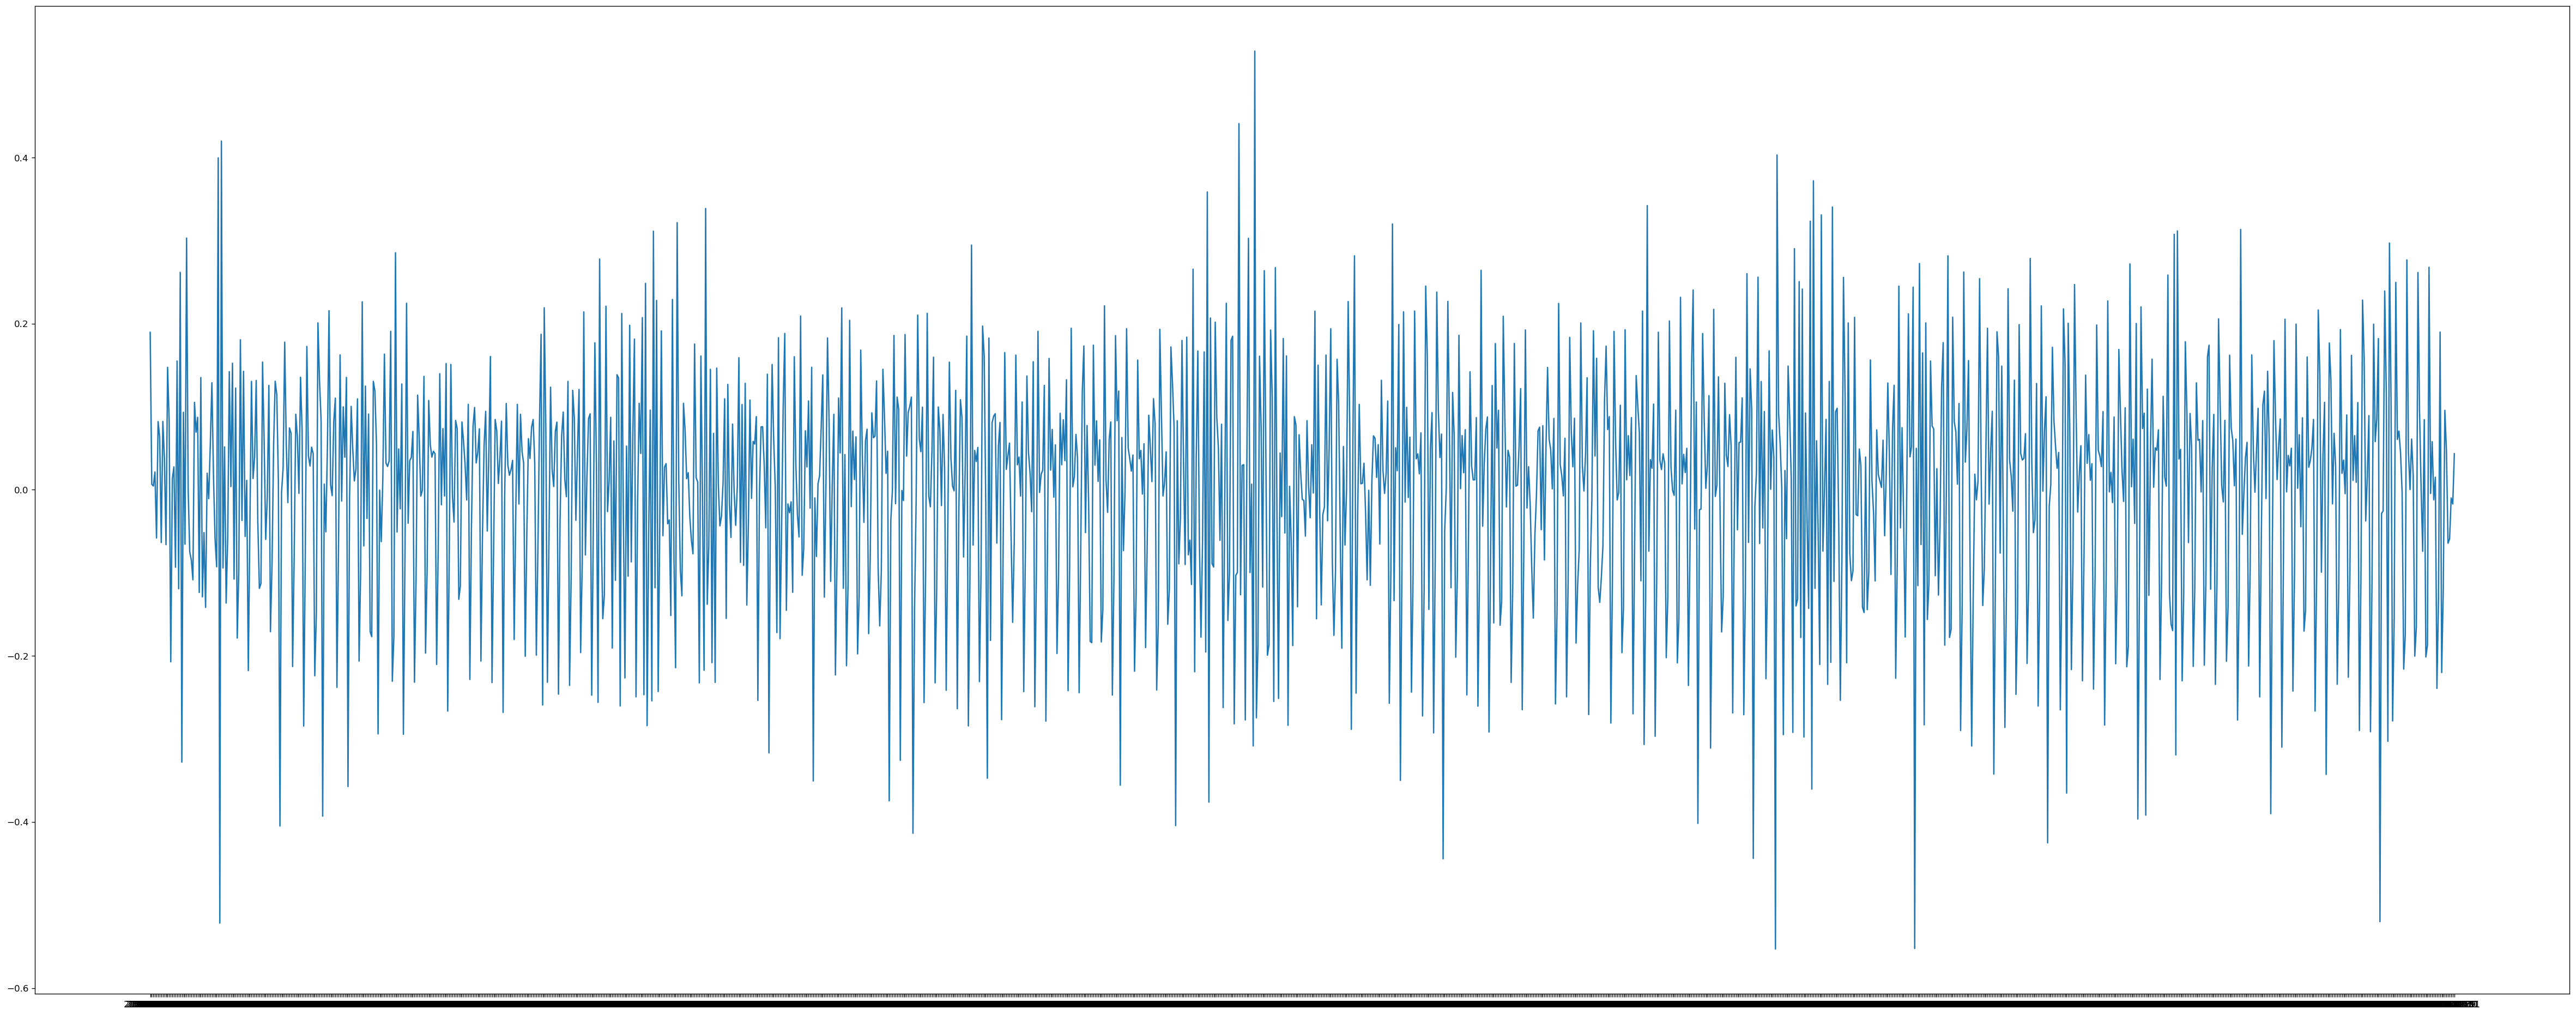

In [23]:
fig, ax = plt.subplots(figsize=(50,20))

# 1st Differencing
plt.plot(np.log(avg_travel_times[:-90]).diff().dropna())
# plt.set_title('1st Order Differencing')

In [20]:
# Create class that calls functions that generate a bunch of graphs for every city csv
# Create ACF and PACF for week days and weekends

In [21]:
from statsmodels.graphics.tsaplots import acf, pacf

results = pacf(avg_travel_times)
print(results)
# print(results[1])
# print(results[2])

[ 1.          0.69232387 -0.08301671  0.07334261  0.13272504  0.21014373
  0.40750204  0.23042109 -0.12888971 -0.16023321 -0.01986564 -0.0084526
 -0.0083969   0.19574665  0.13743726 -0.09849675 -0.09719741  0.03123655
 -0.02669052  0.06756902  0.08956382  0.12740896 -0.06861643 -0.08899337
  0.02095554  0.00952598  0.02670941  0.08763724  0.09845145 -0.03940604
 -0.05357973  0.04308724  0.05030846  0.02508876  0.09884169  0.04515594
  0.00384207 -0.02378673 -0.02250734 -0.01535102 -0.03865773]
